In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit=pd.read_csv("creditcard.csv")

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#sns.heatmap(credit.isnull(),annot=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier

In [8]:
X=credit.drop("Class",axis=True)
Y=credit["Class"]

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.3)

In [10]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [11]:
ros=RandomOverSampler()

In [12]:
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [13]:
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [14]:
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [15]:
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred=model.predict(X_test1)
    print("Classification report")
    print(classification_report(Y_test1,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [16]:
pd.Series(Y_train1).value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [17]:
lr=LogisticRegression()

In [18]:
lr=create_model(lr)

Classification report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

Confusion Matrix
[[83729  1579]
 [ 8806 76502]]


In [19]:
dt=DecisionTreeClassifier() #Decision Tree with ginx Index

In [20]:
dt=create_model(dt)

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85308
           1       1.00      0.65      0.79     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.82    170616
weighted avg       0.87      0.83      0.82    170616

Confusion Matrix
[[85281    27]
 [29750 55558]]


In [21]:
dt.feature_importances_

array([1.23580237e-02, 4.00584088e-03, 0.00000000e+00, 1.32753458e-03,
       5.26559497e-02, 7.05619663e-03, 2.82537686e-03, 1.17869048e-02,
       9.92401235e-03, 4.61578799e-03, 1.23804867e-02, 1.00610848e-03,
       2.38770140e-02, 1.98286814e-02, 7.45292130e-01, 3.22822872e-04,
       3.58522109e-04, 5.87692454e-03, 1.70118027e-03, 1.16564966e-02,
       2.57539044e-02, 1.76265759e-03, 4.47676401e-03, 1.36205335e-03,
       3.27644831e-04, 2.66354410e-03, 9.20970626e-03, 4.95369381e-03,
       5.22157676e-03, 1.54124603e-02])

In [22]:
col=X.columns #V2 V6 V18 V25
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

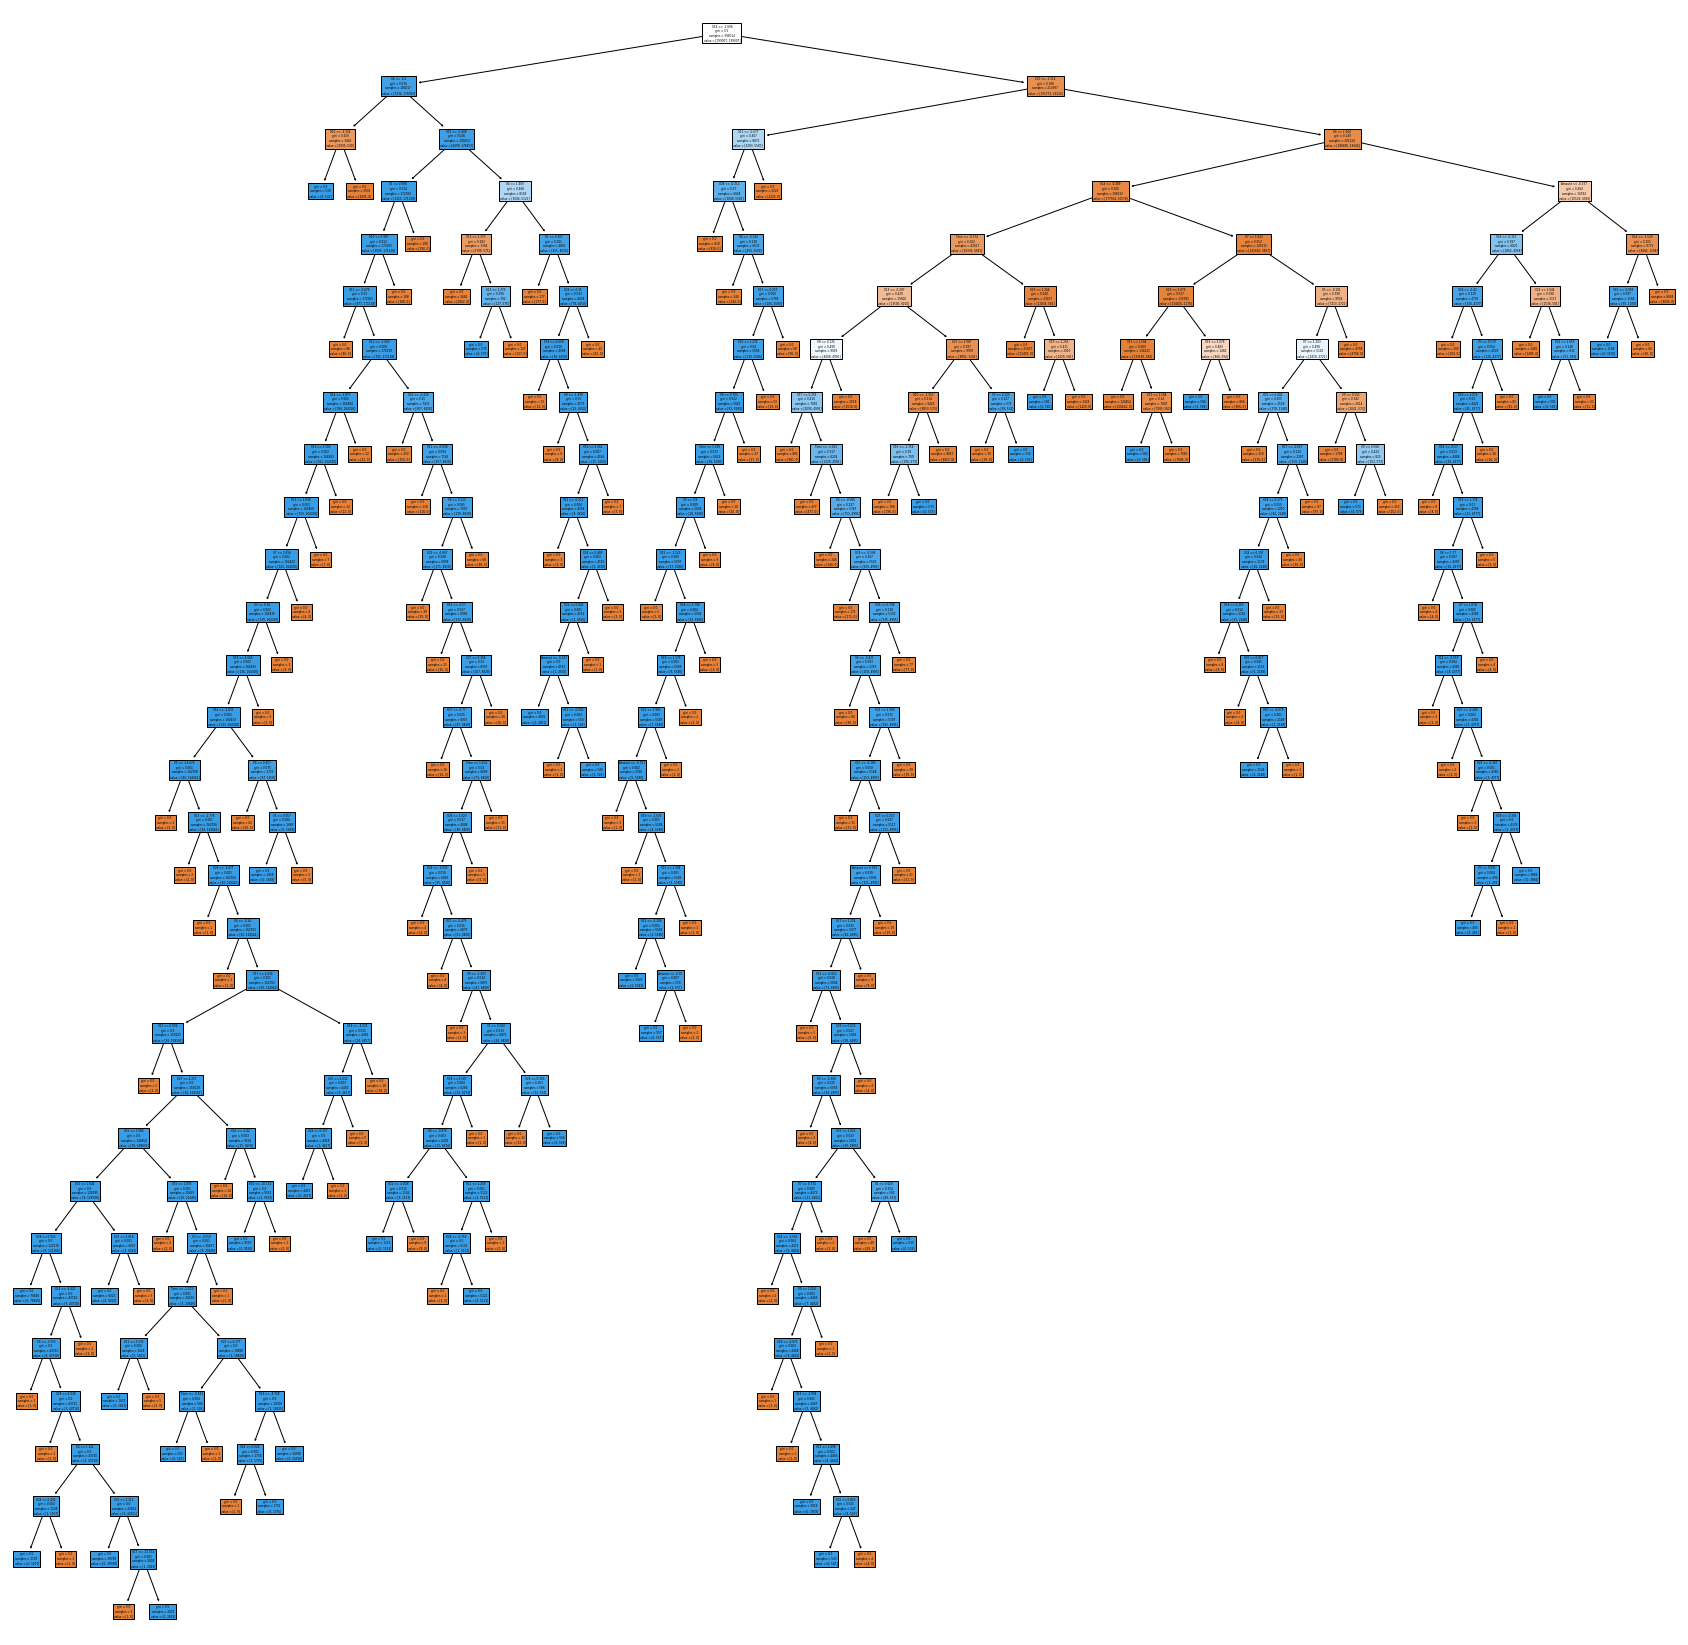

In [23]:
from sklearn import tree 
features=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [24]:
dt1=DecisionTreeClassifier(criterion="entropy") 

In [25]:
dt1=create_model(dt1)

Classification report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.70      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.85    170616
weighted avg       0.88      0.85      0.85    170616

Confusion Matrix
[[85268    40]
 [25392 59916]]


In [26]:
dt1.feature_importances_

array([1.93405273e-03, 3.43673496e-03, 1.33609191e-02, 2.20918032e-03,
       7.11345793e-02, 6.83139385e-03, 8.79123349e-03, 6.12362662e-03,
       8.84343721e-03, 6.68325827e-03, 1.25173933e-02, 1.20390712e-02,
       2.65936974e-02, 1.47913170e-03, 6.88710193e-01, 3.33821474e-03,
       1.23030014e-02, 2.84436464e-03, 2.44042041e-03, 6.54380606e-03,
       1.28838898e-04, 2.54962974e-03, 2.20014011e-02, 9.54241860e-04,
       9.63764163e-03, 2.94214657e-04, 1.50727398e-02, 5.76617689e-03,
       1.02904842e-02, 3.51469213e-02])

In [27]:
col=X.columns
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

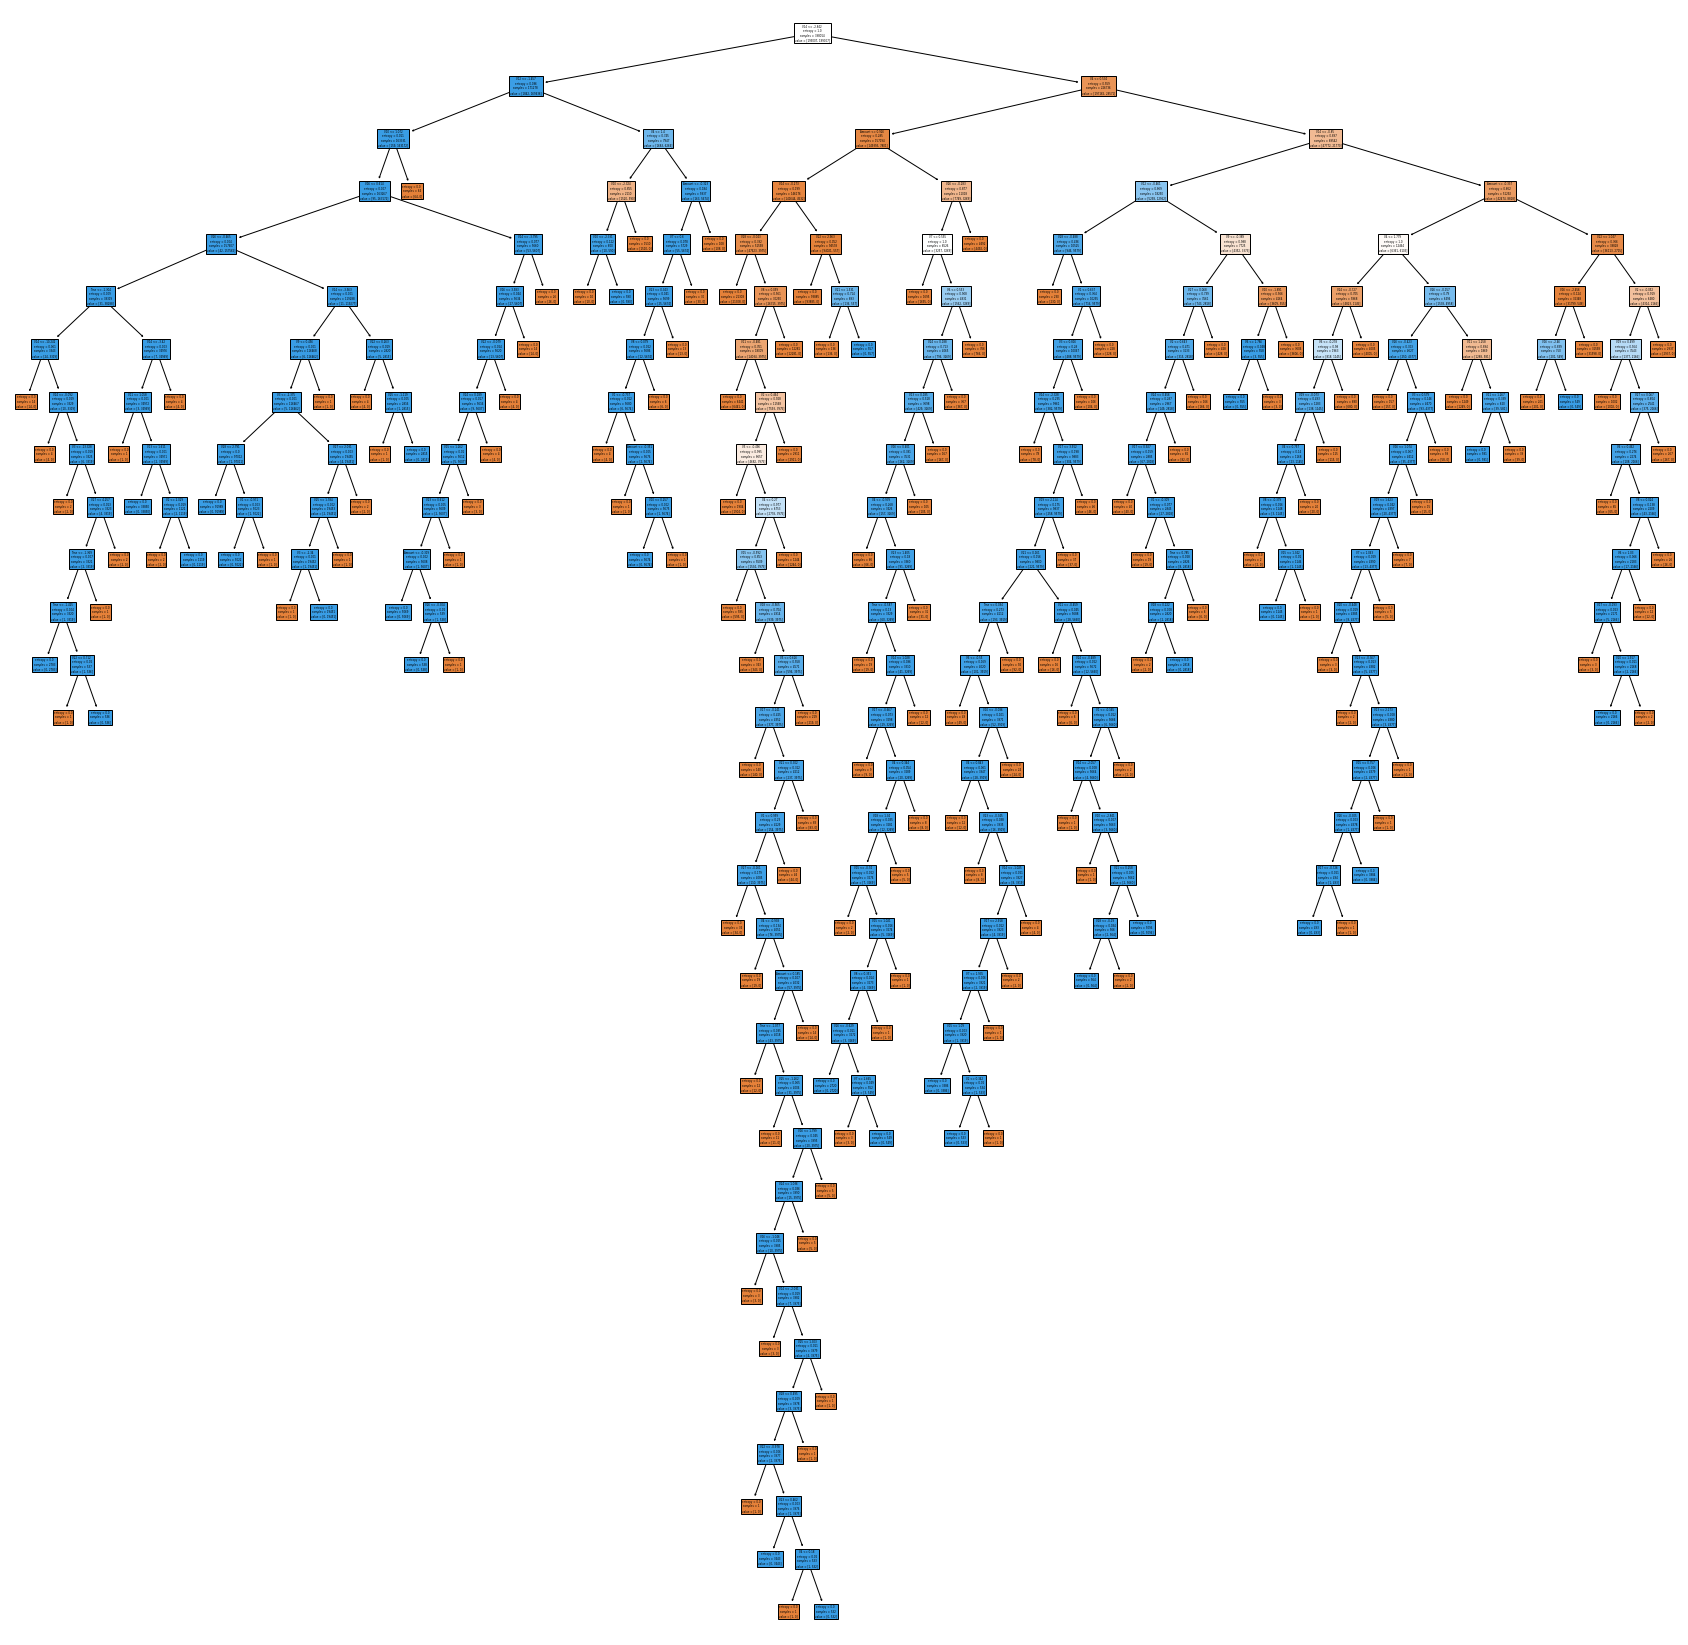

In [28]:
from sklearn import tree 
features=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [29]:
dt2=DecisionTreeClassifier(max_depth=8) 

In [30]:
dt2=create_model(dt2)

Classification report
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     85308
           1       0.99      0.82      0.90     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusion Matrix
[[84296  1012]
 [15245 70063]]


In [31]:
col=X.columns
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [32]:
dt2.feature_importances_

array([8.97996186e-03, 3.61384274e-03, 0.00000000e+00, 1.17237657e-03,
       5.30848191e-02, 7.13195001e-03, 2.72166999e-04, 1.19308799e-02,
       9.47371638e-03, 2.87587431e-03, 1.11202073e-02, 8.73808177e-04,
       2.32040108e-02, 2.01404502e-02, 7.60600521e-01, 0.00000000e+00,
       1.61417381e-04, 4.99810240e-03, 1.31665304e-04, 1.18286677e-02,
       2.61792656e-02, 1.77898456e-03, 4.32500826e-03, 9.47075090e-04,
       0.00000000e+00, 2.23851361e-03, 8.30650702e-03, 4.18967492e-03,
       4.92480458e-03, 1.55157282e-02])

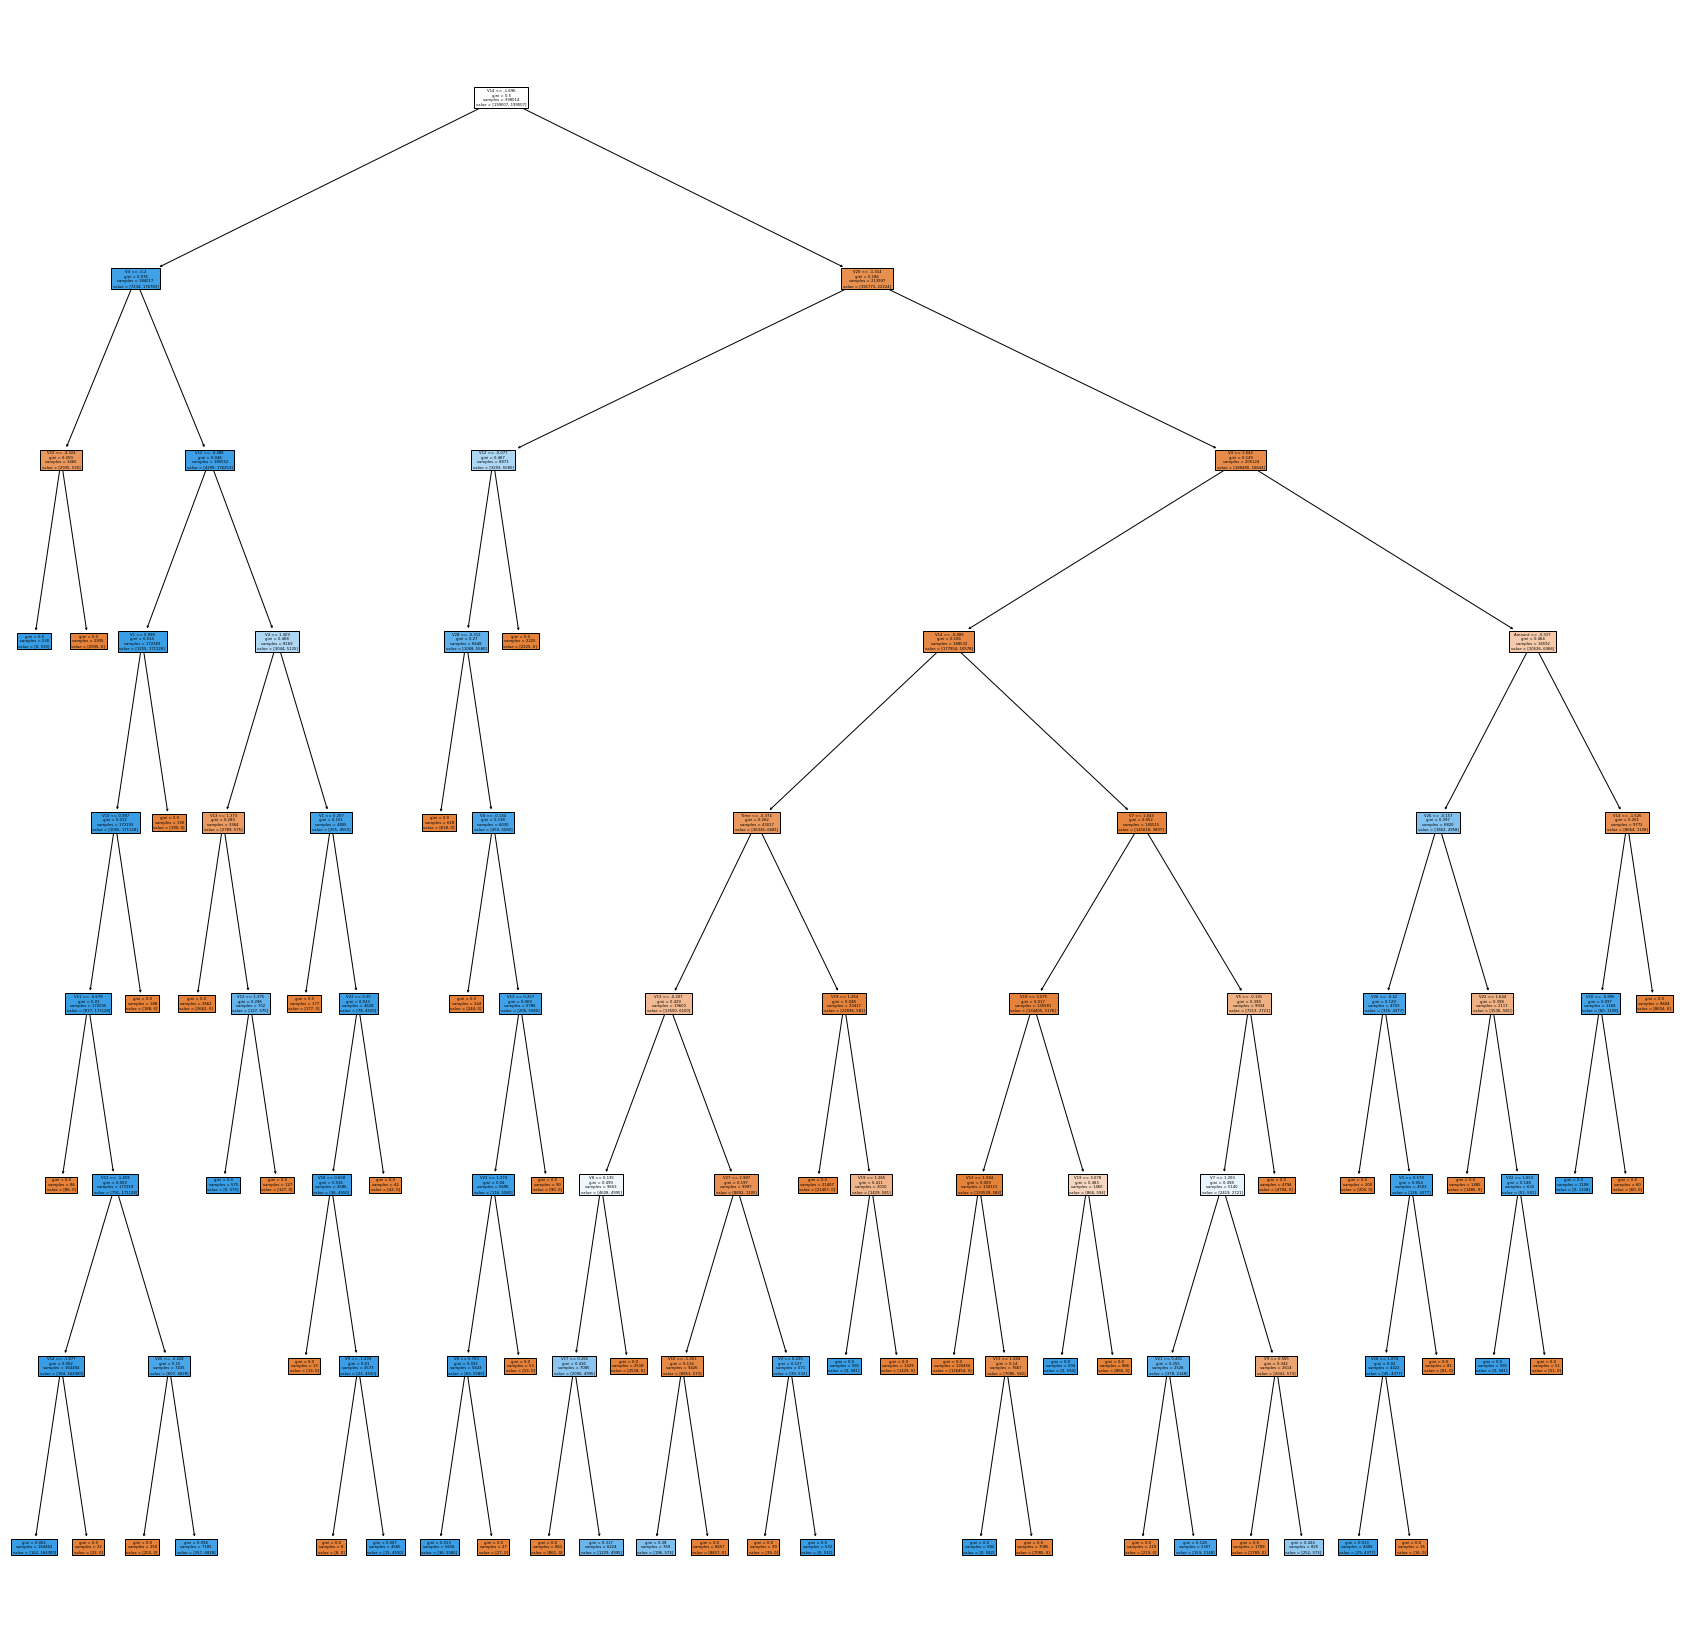

In [33]:
from sklearn import tree
feature=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [72]:
dt3=DecisionTreeClassifier(min_samples_leaf=50) 

In [73]:
dt3=create_model(dt3)

Classification report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.89    170616
weighted avg       0.91      0.90      0.89    170616

Confusion Matrix
[[85155   153]
 [17704 67604]]


In [36]:
dt3.feature_importances_

array([1.23744226e-02, 3.68449515e-03, 3.53132849e-07, 1.34743172e-03,
       5.27164801e-02, 6.99012984e-03, 2.87980332e-03, 1.18737445e-02,
       9.92991941e-03, 4.49893219e-03, 1.23710498e-02, 8.56706195e-04,
       2.39405215e-02, 1.97399535e-02, 7.45778441e-01, 3.44353247e-04,
       3.60523289e-04, 5.86918182e-03, 1.75133857e-03, 1.15934524e-02,
       2.56587526e-02, 1.74441483e-03, 4.75471478e-03, 1.30361506e-03,
       1.28401418e-04, 3.09368702e-03, 8.83211234e-03, 4.58606196e-03,
       5.58752890e-03, 1.54094774e-02])

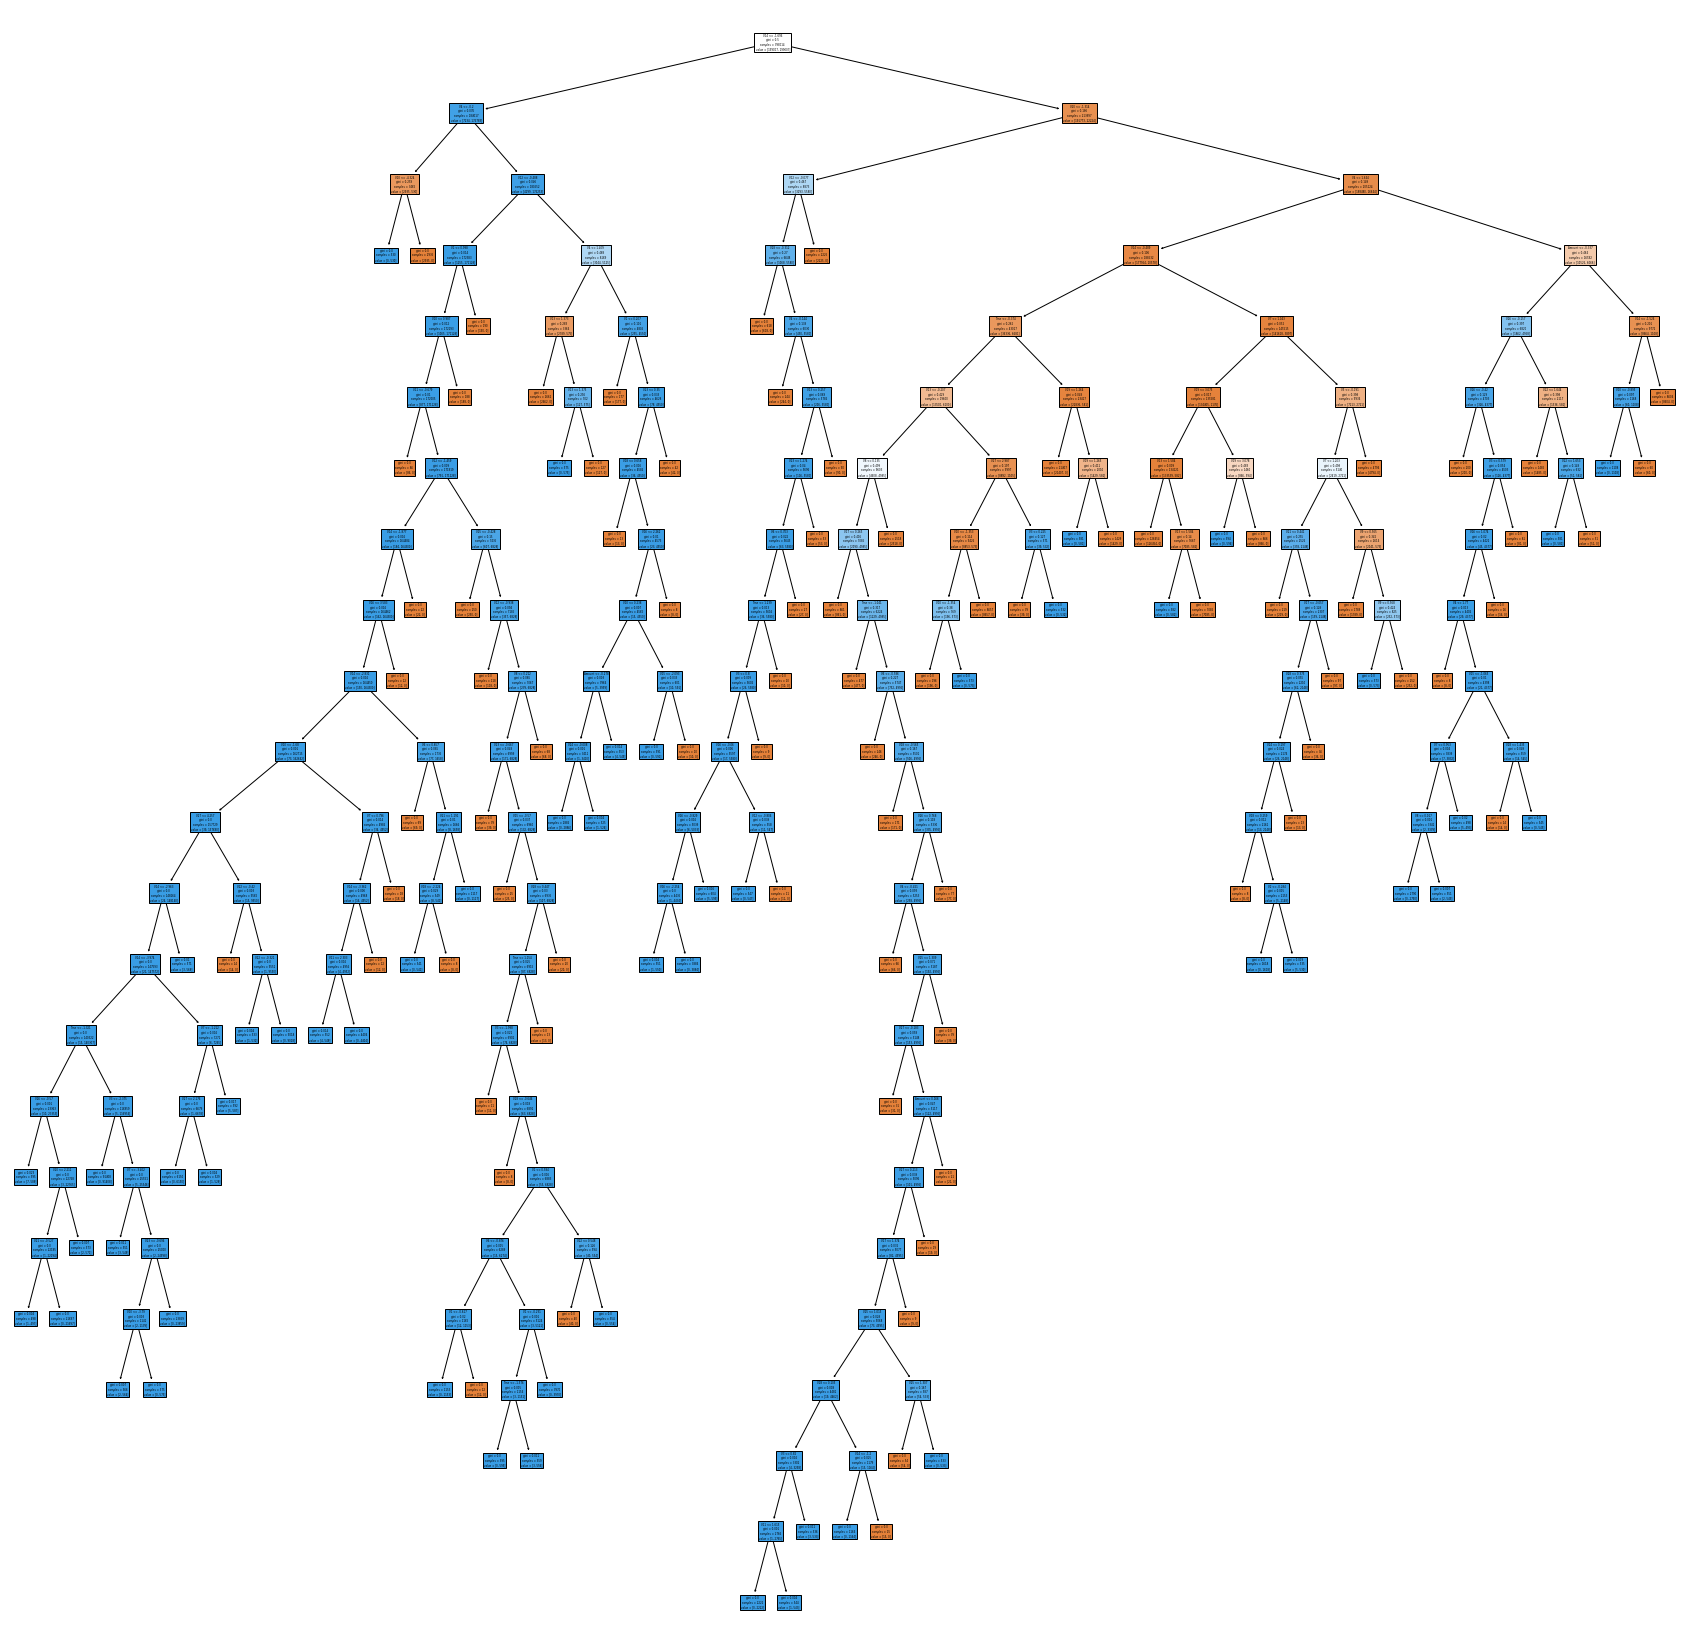

In [37]:
feature=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [38]:
#Ensembling Techniques

In [39]:
#Hard voting

In [40]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
dt1=DecisionTreeClassifier(criterion="entropy")

In [41]:
model_list=[("LogisticRegression",lr),("DecisionTreegini",dt),("DecisionTreeClassifierentropy",dt1)]

In [42]:
vc=VotingClassifier(estimators=model_list)

In [43]:
vc=create_model(vc)

Classification report
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85308
           1       1.00      0.76      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

Confusion Matrix
[[85275    33]
 [20208 65100]]


In [44]:
vc1=VotingClassifier(estimators=model_list,voting="soft")

In [45]:
vc1=create_model(vc1)

Classification report
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85308
           1       1.00      0.76      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

Confusion Matrix
[[85272    36]
 [20208 65100]]


In [46]:
#Bagging techinques

In [47]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=28480,random_state=1)

In [48]:
bc=create_model(bc)

Classification report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

Confusion Matrix
[[83700  1608]
 [ 8806 76502]]


In [49]:
bc1=BaggingClassifier(LogisticRegression(),n_estimators=8,max_samples=28480,random_state=1,bootstrap=False)

In [50]:
bc1=create_model(bc1)

Classification report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

Confusion Matrix
[[83697  1611]
 [ 8806 76502]]


In [51]:
rfs=BaggingClassifier(DecisionTreeClassifier(),n_estimators=8,max_samples=284800,random_state=1) #means 670*10 records are passed

In [52]:
rfs=create_model(rfs)

Classification report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       1.00      0.76      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

Confusion Matrix
[[85287    21]
 [20846 64462]]


In [53]:
#Boosting Techniques 

In [54]:
ada=AdaBoostClassifier(n_estimators=75)

In [55]:
ada=create_model(ada)

Classification report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85308
           1       0.99      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84391   917]
 [13205 72103]]


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=75)

In [57]:
gb=create_model(gb)

Classification report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

Confusion Matrix
[[84716   592]
 [11318 73990]]


In [58]:
xgb=XGBClassifier(n_estimators=75,reg_alpha=100)

In [59]:
xgb=create_model(xgb)

[20:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     85308
           1       1.00      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[85221    87]
 [13881 71427]]


In [60]:
svc=LinearSVC(random_state=1)

In [61]:
svc=create_model(svc)

Classification report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

Confusion Matrix
[[83840  1468]
 [ 8806 76502]]


In [62]:
svc1=LinearSVC(random_state=1,C=0.08)

In [63]:
svc1=create_model(svc1)

Classification report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     85308
           1       0.98      0.87      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix
[[83954  1354]
 [10712 74596]]


In [74]:
poly_svc=SVC(random_state=1,kernel="poly")

In [75]:
poly_svc=create_model(poly_svc)

Classification report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     85308
           1       1.00      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[85084   224]
 [13878 71430]]


In [76]:
r_svc=SVC(random_state=1,kernel="rbf")

In [ ]:
r_svc=create_model(r_svc)

In [68]:
#gb=GaussianNB()

In [69]:
#gb=create_model(gb)

In [70]:
knc=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)

In [71]:
knc=create_model(knc)

Classification report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.89    170616
weighted avg       0.91      0.90      0.89    170616

Confusion Matrix
[[85223    85]
 [17742 67566]]
